# **Problem Definition**
Traditionally, the design of a cellular network focuses on the optimization of energy and resources that guarantees a smooth operation even during peak hours (i.e. periods with higher traffic load). However, this implies that cells are most of the time overprovisioned of radio resources. Next generation cellular networks ask for a dynamic management and configuration in order to adapt to the varying user demands in the most efficient way with regards to energy savings and utilization of frequency resources. If the network operator were capable of anticipating to those variations in the users’ traffic demands, a more efficient management of the scarce (and expensive) network resources would be possible.

Current research in mobile networks looks upon Machine Learning (ML) techniques to help manage those resources. In this case, you will explore the possibilities of ML to detect abnormal behaviors in the utilization of the network that would motivate a change in the configuration of the base station.

The purpose of this model is to accurately as possible predict the abnormal behaviors in the utilization of the network that would motivate a change in the configuration of the base station.

# **Data Description**
The dataset has been obtained from a real LTE deployment. During two weeks, different metrics were gathered from a set of 10 base stations, each having a different number of cells, every 15 minutes. The dataset is provided in the form of a csv file, where each row corresponds to a sample obtained from one particular cell at a certain time.

# **Feature Description**
• Time : hour of the day (in the format hh:mm) when the sample was generated.

• CellName1: text string used to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station (see the example in the right figure).

• PRBUsageUL and PRBUsageDL: level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.

• meanThrDL and meanThrUL: average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately.

• maxThrDL and maxThrUL: maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.

• meanUEDL and meanUEUL: average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.

• maxUEDL and maxUEUL: maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.

• maxUE_UL+DL: maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.

• Unusual: labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior.

# **Evaluation**
We would be using the below **Classification** evaluation metrics.
1. Accuracy
2. Precision
3. Recall
4. ROC Curve
5. AUC
6. F1-Score

### Environment Preparation

In [151]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn

### Data Exploration


In [152]:
# Import Data
df_train = pd.read_csv(r'C:\Users\OlumayowaOyaleke\Desktop\Anomaly Detection\ML-MATT-CompetitionQT1920_train.csv',encoding='windows-1252')
df_test = pd.read_csv(r'C:\Users\OlumayowaOyaleke\Desktop\Anomaly Detection\ML-MATT-CompetitionQT1920_test.csv',encoding='windows-1252')

In [153]:
# Explore Training Dataframe
df_train
df_test

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.781,1.493,0.575,0.042,22.659,0.743,0.985,0.010,3.0,2.0,5.0
1,20:30,6ULTE,2.021,3.335,0.569,0.075,29.265,1.049,1.314,0.010,6.0,3.0,9.0
2,11:30,2ALTE,0.505,0.404,0.014,0.010,0.227,0.097,1.011,0.010,2.0,1.0,3.0
3,6:45,3CLTE,1.011,0.505,0.238,0.021,20.962,0.609,1.011,1.011,2.0,1.0,3.0
4,15:45,6CLTE,3.881,0.498,0.076,0.041,3.936,1.768,1.025,0.010,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,7:30,8BLTE,7.074,1.011,0.345,0.047,17.576,0.927,1.152,1.031,5.0,3.0,8.0
9154,0:30,7CLTE,0.100,0.498,0.047,0.011,4.780,0.341,1.045,0.010,3.0,2.0,5.0
9155,2:00,5ALTE,1.213,0.505,0.209,0.024,6.720,0.421,1.021,1.011,2.0,1.0,3.0
9156,3:30,8ALTE,5.457,1.112,0.474,0.023,4.608,0.300,1.071,1.021,4.0,2.0,6.0


In [154]:
df_train.head().T

,0,1,2,3,4
Time,10:45,9:45,7:45,2:45,3:30
CellName,3BLTE,1BLTE,9BLTE,4ALTE,10BLTE
PRBUsageUL,11.642,21.791,0.498,1.891,0.303
PRBUsageDL,1.393,1.891,0.398,1.095,0.404
meanThr_DL,0.37,0.537,0.015,0.94,0.016
meanThr_UL,0.041,0.268,0.01,0.024,0.013
maxThr_DL,15.655,10.273,0.262,60.715,0.348
maxThr_UL,0.644,1.154,0.164,0.825,0.168
meanUE_DL,1.114,1.353,0.995,1.035,1.011
meanUE_UL,1.025,1.085,0.995,0.995,1.011


In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36899 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


In [156]:
df_train.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


In [157]:
df_train.Time

0        10:45
1         9:45
2         7:45
3         2:45
4         3:30
         ...  
36899    21:30
36900     9:45
36901    13:30
36902    12:30
36903    15:45
Name: Time, Length: 36904, dtype: object

In [158]:
df_train.Time.value_counts()

12:00    423
3:00     417
9:45     410
7:30     409
0:30     407
        ... 
20:30    358
16:30    358
19:00    357
15:45    355
21:00    351
Name: Time, Length: 96, dtype: int64

In [159]:
#Parse TimeStamp
from datetime import datetime

df_train.Time = pd.to_datetime(df_train.Time.str.lower(), format="%H:%M",)

In [160]:
df_train.Time

0       1900-01-01 10:45:00
1       1900-01-01 09:45:00
2       1900-01-01 07:45:00
3       1900-01-01 02:45:00
4       1900-01-01 03:30:00
                ...        
36899   1900-01-01 21:30:00
36900   1900-01-01 09:45:00
36901   1900-01-01 13:30:00
36902   1900-01-01 12:30:00
36903   1900-01-01 15:45:00
Name: Time, Length: 36904, dtype: datetime64[ns]

### Handle Data Types

In [161]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         36904 non-null  datetime64[ns]
 1   CellName     36904 non-null  object        
 2   PRBUsageUL   36904 non-null  float64       
 3   PRBUsageDL   36904 non-null  float64       
 4   meanThr_DL   36904 non-null  float64       
 5   meanThr_UL   36904 non-null  float64       
 6   maxThr_DL    36904 non-null  float64       
 7   maxThr_UL    36904 non-null  float64       
 8   meanUE_DL    36904 non-null  float64       
 9   meanUE_UL    36904 non-null  float64       
 10  maxUE_DL     36815 non-null  float64       
 11  maxUE_UL     36815 non-null  float64       
 12  maxUE_UL+DL  36899 non-null  object        
 13  Unusual      36904 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 3.9+ MB


In [162]:
df_train

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,1900-01-01 10:45:00,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,1900-01-01 09:45:00,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,1900-01-01 07:45:00,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,1900-01-01 02:45:00,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,1900-01-01 03:30:00,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,1900-01-01 21:30:00,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,7,0
36900,1900-01-01 09:45:00,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,6,0
36901,1900-01-01 13:30:00,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,7,1
36902,1900-01-01 12:30:00,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,9,0


In [163]:
df_train.maxUE_DL.value_counts()

3.0     8096
4.0     7843
5.0     6219
2.0     4941
6.0     4375
7.0     2488
1.0     1162
8.0     1075
9.0      350
0.0      161
10.0      87
11.0      16
12.0       2
Name: maxUE_DL, dtype: int64

In [164]:
df_train.maxUE_UL.value_counts()

2.0     11286
3.0     11163
4.0      6137
5.0      3040
1.0      2841
6.0      1379
7.0       534
0.0       183
8.0       180
9.0        48
10.0       21
11.0        2
12.0        1
Name: maxUE_UL, dtype: int64

In [165]:
df_train['maxUE_UL+DL'].value_counts()

5           5939
7           5322
8           3889
6           3883
9           3439
4           3391
10          2539
11          1899
3           1636
12          1388
2           1118
13           909
14           597
15           326
16           178
0            158
#¡VALOR!      84
17            82
18            41
19            31
1             28
20            18
23             2
21             2
Name: maxUE_UL+DL, dtype: int64

In [166]:
df_train.CellName.value_counts()

5ALTE     1157
4CLTE     1150
4ALTE     1147
8ALTE     1142
8CLTE     1137
6VLTE     1134
6ALTE     1134
4BLTE     1134
6WLTE     1133
5CLTE     1131
3CLTE     1131
6ULTE     1129
7BLTE     1128
1ALTE     1122
10ALTE    1121
7ULTE     1120
1CLTE     1120
8BLTE     1118
10CLTE    1117
3BLTE     1117
1BLTE     1117
7WLTE     1116
2ALTE     1116
9BLTE     1116
6BLTE     1112
3ALTE     1107
10BLTE    1107
5BLTE     1104
6CLTE     1102
9ALTE     1099
7CLTE     1096
7ALTE     1083
7VLTE     1007
Name: CellName, dtype: int64

In [167]:
df_train.Unusual.value_counts()

0    26721
1    10183
Name: Unusual, dtype: int64

In [168]:
#Convert Unusual Column to Object Data Type
df_train.Unusual = df_train.Unusual.astype('object')

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         36904 non-null  datetime64[ns]
 1   CellName     36904 non-null  object        
 2   PRBUsageUL   36904 non-null  float64       
 3   PRBUsageDL   36904 non-null  float64       
 4   meanThr_DL   36904 non-null  float64       
 5   meanThr_UL   36904 non-null  float64       
 6   maxThr_DL    36904 non-null  float64       
 7   maxThr_UL    36904 non-null  float64       
 8   meanUE_DL    36904 non-null  float64       
 9   meanUE_UL    36904 non-null  float64       
 10  maxUE_DL     36815 non-null  float64       
 11  maxUE_UL     36815 non-null  float64       
 12  maxUE_UL+DL  36899 non-null  object        
 13  Unusual      36904 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 3.9+ MB


In [170]:
label = ['maxUE_DL','maxUE_UL','maxUE_UL+DL'] 

In [171]:
#Convert Unusual Column to Object Data Type
df_train.maxUE_DL = df_train.maxUE_DL.astype('object')

#Convert maxUE_UL Column to Object Data Type
df_train.maxUE_UL = df_train.maxUE_UL.astype('object')

#Convert maxUE_UL+DL Column to Object Data Type
df_train['maxUE_UL+DL'] = df_train['maxUE_UL+DL'].astype('object')


In [172]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         36904 non-null  datetime64[ns]
 1   CellName     36904 non-null  object        
 2   PRBUsageUL   36904 non-null  float64       
 3   PRBUsageDL   36904 non-null  float64       
 4   meanThr_DL   36904 non-null  float64       
 5   meanThr_UL   36904 non-null  float64       
 6   maxThr_DL    36904 non-null  float64       
 7   maxThr_UL    36904 non-null  float64       
 8   meanUE_DL    36904 non-null  float64       
 9   meanUE_UL    36904 non-null  float64       
 10  maxUE_DL     36815 non-null  object        
 11  maxUE_UL     36815 non-null  object        
 12  maxUE_UL+DL  36899 non-null  object        
 13  Unusual      36904 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 3.9+ MB


In [173]:
#Convert Object Data Type to Category
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         36904 non-null  datetime64[ns]
 1   CellName     36904 non-null  category      
 2   PRBUsageUL   36904 non-null  float64       
 3   PRBUsageDL   36904 non-null  float64       
 4   meanThr_DL   36904 non-null  float64       
 5   meanThr_UL   36904 non-null  float64       
 6   maxThr_DL    36904 non-null  float64       
 7   maxThr_UL    36904 non-null  float64       
 8   meanUE_DL    36904 non-null  float64       
 9   meanUE_UL    36904 non-null  float64       
 10  maxUE_DL     36815 non-null  category      
 11  maxUE_UL     36815 non-null  category      
 12  maxUE_UL+DL  36899 non-null  category      
 13  Unusual      36904 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(8)
memory usage: 2.7 MB


### Handle Null Values

In [175]:
#Check for Null Values
Percentage_null = df_train.isnull().sum()/len(df_train)*100
Percentage_null

Time           0.000000
CellName       0.000000
PRBUsageUL     0.000000
PRBUsageDL     0.000000
meanThr_DL     0.000000
meanThr_UL     0.000000
maxThr_DL      0.000000
maxThr_UL      0.000000
meanUE_DL      0.000000
meanUE_UL      0.000000
maxUE_DL       0.241166
maxUE_UL       0.241166
maxUE_UL+DL    0.013549
Unusual        0.000000
dtype: float64

In [176]:
#Numerical Columns
for label, content in df_train.items():
    if pd.api.types.is_float_dtype(content):
        print(label)

PRBUsageUL
PRBUsageDL
meanThr_DL
meanThr_UL
maxThr_DL
maxThr_UL
meanUE_DL
meanUE_UL


In [177]:
#Categorical Columns
for label, content in df_train.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

CellName
maxUE_DL
maxUE_UL
maxUE_UL+DL
Unusual


After exploring the dataset we could replace the **Numerical Null values** with its **median** and **Categorical Null values** with its **mode**

In [178]:
#Fill in Numerical Columns with the median
for label, content in df_train.items():
    if pd.api.types.is_float_dtype(content):
        if pd.isnull(content).sum():
            df_train[label] = content.fillna(content.median())
        

In [179]:
#Fill in Categorical Columns with the mode
for label, content in df_train.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        df_train[label] = content.fillna(content.value_counts().index[0])

#df_train['maxUE_DL'] = df_train['maxUE_DL'].fillna(df_train['maxUE_DL'].mode())

maxUE_DL
maxUE_UL
maxUE_UL+DL


In [180]:
df_train.isnull().sum()

Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
dtype: int64

### Feature Engineering for DateTime Column

In [181]:
df_train['Time']

0       1900-01-01 10:45:00
1       1900-01-01 09:45:00
2       1900-01-01 07:45:00
3       1900-01-01 02:45:00
4       1900-01-01 03:30:00
                ...        
36899   1900-01-01 21:30:00
36900   1900-01-01 09:45:00
36901   1900-01-01 13:30:00
36902   1900-01-01 12:30:00
36903   1900-01-01 15:45:00
Name: Time, Length: 36904, dtype: datetime64[ns]

In [182]:
df_train['Year'] = df_train.Time.dt.year
df_train['Month'] = df_train.Time.dt.month
df_train['Day'] = df_train.Time.dt.day
df_train['Hour'] = df_train.Time.dt.hour
df_train['Min'] = df_train.Time.dt.minute
df_train['Seconds'] = df_train.Time.dt.second

In [183]:
df_train

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual,Year,Month,Day,Hour,Min,Seconds
0,1900-01-01 10:45:00,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1,1900,1,1,10,45,0
1,1900-01-01 09:45:00,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1,1900,1,1,9,45,0
2,1900-01-01 07:45:00,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1,1900,1,1,7,45,0
3,1900-01-01 02:45:00,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1,1900,1,1,2,45,0
4,1900-01-01 03:30:00,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0,1900,1,1,3,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,1900-01-01 21:30:00,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,7,0,1900,1,1,21,30,0
36900,1900-01-01 09:45:00,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,6,0,1900,1,1,9,45,0
36901,1900-01-01 13:30:00,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,7,1,1900,1,1,13,30,0
36902,1900-01-01 12:30:00,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,9,0,1900,1,1,12,30,0


In [184]:
#Drop Year, Month, Day and Second Column
df_train.drop('Year', axis = 1,inplace = True)
df_train.drop('Month', axis = 1, inplace = True)
df_train.drop('Day', axis = 1, inplace = True)
df_train.drop('Seconds', axis = 1, inplace = True)


In [185]:
df_train.drop('Time',axis = 1, inplace = True)

In [186]:
df_train

,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual,Hour,Min
0,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1,10,45
1,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1,9,45
2,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1,7,45
3,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1,2,45
4,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,6ALTE,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,4.0,3.0,7,0,21,30
36900,8CLTE,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,4.0,2.0,6,0,9,45
36901,9BLTE,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,4.0,3.0,7,1,13,30
36902,3CLTE,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,5.0,4.0,9,0,12,30


In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CellName     36904 non-null  category
 1   PRBUsageUL   36904 non-null  float64 
 2   PRBUsageDL   36904 non-null  float64 
 3   meanThr_DL   36904 non-null  float64 
 4   meanThr_UL   36904 non-null  float64 
 5   maxThr_DL    36904 non-null  float64 
 6   maxThr_UL    36904 non-null  float64 
 7   meanUE_DL    36904 non-null  float64 
 8   meanUE_UL    36904 non-null  float64 
 9   maxUE_DL     36904 non-null  category
 10  maxUE_UL     36904 non-null  category
 11  maxUE_UL+DL  36904 non-null  category
 12  Unusual      36904 non-null  category
 13  Hour         36904 non-null  int64   
 14  Min          36904 non-null  int64   
dtypes: category(5), float64(8), int64(2)
memory usage: 3.0 MB


### Data Visualization

<AxesSubplot:>

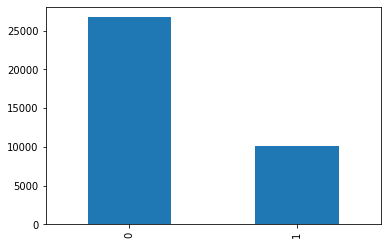

In [188]:
df_train.Unusual.value_counts().plot.bar()

<AxesSubplot:>

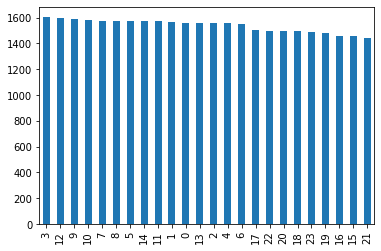

In [189]:
df_train.Hour.value_counts().plot.bar()

<AxesSubplot:>

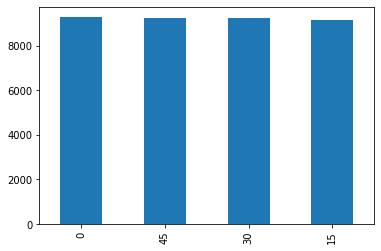

In [190]:
df_train.Min.value_counts().plot.bar()

From the visualization of the target column we can see that we have an imbalanced data

In [191]:
# Define X and y
X = df_train.drop('Unusual', axis = 1)
y =df_train.Unusual

### Encoding Categorical Values


In [192]:
for label, content in X.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        X[label] = pd.Categorical(content).codes+1

In [193]:
X

,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Hour,Min
0,9,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,5,4,22,10,45
1,5,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,7,5,4,9,45
2,33,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,2,2,14,7,45
3,11,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,3,3,19,2,45
4,2,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,3,2,18,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36899,17,7.579,0.808,0.164,0.037,7.980,0.375,1.101,0.010,5,4,22,21,30
36900,31,9.095,1.213,0.189,0.030,19.510,1.583,1.122,1.031,5,3,21,9,45
36901,33,4.378,0.896,0.341,0.030,12.037,0.540,1.065,1.005,5,4,22,13,30
36902,10,13.339,2.728,0.559,0.065,28.187,0.894,1.223,1.061,6,5,24,12,30


In [195]:
y

0        1
1        1
2        1
3        1
4        0
        ..
36899    0
36900    0
36901    1
36902    0
36903    0
Name: Unusual, Length: 36904, dtype: category
Categories (2, int64): [0 < 1]

### Handling Imbalaced Data Values


0 >>>> False

1 >>>> True

In [196]:
# Seperating Anomalause and Non-Anomalouse Data
Anomal = df_train[df_train.Unusual == 1]
Non_Anomal = df_train[df_train.Unusual == 0]

In [197]:
print(Anomal.shape)
print(Non_Anomal.shape)

(10183, 15)
(26721, 15)


**Under Sampling**

Build a sample dataset containing similar distribution of Anomalouse and non Anomalouse

Number of Anomalouse = 10183


In [198]:
Non_Anomal_sample = Non_Anomal.sample(n = 10183)
print(Non_Anomal_sample.shape)

(10183, 15)


In [199]:
Un_df_train = pd.concat([Non_Anomal_sample,Anomal], axis = 0 )

In [200]:
Un_df_train.Unusual.value_counts()

0    10183
1    10183
Name: Unusual, dtype: int64

**Over Sampling**
Build a sample dataset containing similar distribution of Anomalouse and non Anomalouse

Number of Anomalouse = 26721 


In [201]:
Anomal_sample = Anomal.sample(n = 26721,replace=True)
print(Anomal_sample.shape)

(26721, 15)


In [202]:
Ov_df_train = pd.concat([Anomal_sample,Non_Anomal], axis = 0 )

In [203]:
Ov_df_train.Unusual.value_counts()

0    26721
1    26721
Name: Unusual, dtype: int64

**SMOTE Sampling** (Using imblearn)

Build a sample dataset containing new distribution of Anomalouse and non Anomalouse




In [204]:
from imblearn.over_sampling import SMOTE
from collections import Counter
SMOTE = SMOTE()

In [205]:
print('Original Dataset: %s' % Counter(y))
X_sm,y_sm = SMOTE.fit_resample(X,y)
print('After Implementing SMOTE : %s' % Counter(y_sm))

Original Dataset: Counter({0: 26721, 1: 10183})
After Implementing SMOTE : Counter({1: 26721, 0: 26721})


Now we have 3 dataframes for experimentation : 

1. Un_df_train
2. Ov_df_train
3. sm_df

### Split Data into Train and Validation Set



In [207]:
from sklearn.model_selection import train_test_split

## Experiment 1 : using SMOTE Dataset

In [218]:
X_sm

,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Hour,Min
0,9,11.642000,1.393000,0.370000,0.041000,15.655000,0.644000,1.114000,1.025000,5,4,22,10,45
1,5,21.791000,1.891000,0.537000,0.268000,10.273000,1.154000,1.353000,1.085000,7,5,4,9,45
2,33,0.498000,0.398000,0.015000,0.010000,0.262000,0.164000,0.995000,0.995000,2,2,14,7,45
3,11,1.891000,1.095000,0.940000,0.024000,60.715000,0.825000,1.035000,0.995000,3,3,19,2,45
4,2,0.303000,0.404000,0.016000,0.013000,0.348000,0.168000,1.011000,1.011000,3,2,18,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,15,9.387395,0.864790,0.117642,0.019691,5.053038,0.360296,1.068457,1.018457,5,4,22,17,30
53438,9,12.208672,1.393000,0.219851,0.051350,5.431194,0.424812,1.239339,1.099884,5,4,23,12,15
53439,29,4.306775,0.689341,0.110156,0.015716,2.992853,0.257998,1.039317,1.005000,4,3,20,4,0
53440,2,4.307854,0.796000,0.199168,0.033508,5.847585,0.738687,1.048417,1.018167,4,3,20,19,30


In [219]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53442 entries, 0 to 53441
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CellName     53442 non-null  int8   
 1   PRBUsageUL   53442 non-null  float64
 2   PRBUsageDL   53442 non-null  float64
 3   meanThr_DL   53442 non-null  float64
 4   meanThr_UL   53442 non-null  float64
 5   maxThr_DL    53442 non-null  float64
 6   maxThr_UL    53442 non-null  float64
 7   meanUE_DL    53442 non-null  float64
 8   meanUE_UL    53442 non-null  float64
 9   maxUE_DL     53442 non-null  int8   
 10  maxUE_UL     53442 non-null  int8   
 11  maxUE_UL+DL  53442 non-null  int8   
 12  Hour         53442 non-null  int64  
 13  Min          53442 non-null  int64  
dtypes: float64(8), int64(2), int8(4)
memory usage: 4.3 MB


In [221]:
y_sm

0        1
1        1
2        1
3        1
4        0
        ..
53437    1
53438    1
53439    1
53440    1
53441    1
Name: Unusual, Length: 53442, dtype: category
Categories (2, int64): [0 < 1]

In [222]:
X_sm.shape,y_sm.shape

((53442, 14), (53442,))

In [224]:
X_sm_train,X_sm_val,y_sm_train,y_sm_val = train_test_split(X_sm,
y_sm,
 test_size= 0.2,
 random_state= 42)

In [225]:
X_sm_train.shape,y_sm_train.shape,  X_sm_val.shape, y_sm_val.shape

((42753, 14), (42753,), (10689, 14), (10689,))

### Base Model Building (Experiment 1)


In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
RFC = RandomForestClassifier()
RFC.fit(X_sm_train,y_sm_train)

RandomForestClassifier()

In [232]:
y_sm_preds = RFC.predict(X_sm_val)

In [233]:
y_sm_preds

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [234]:
y_sm_val

2322     0
9803     0
44441    1
44689    1
10476    1
        ..
16358    0
24711    0
49367    1
28566    0
45271    1
Name: Unusual, Length: 10689, dtype: category
Categories (2, int64): [0 < 1]

In [235]:
#Evaluation
from sklearn.metrics import classification_report

In [236]:
print(classification_report(y_true=y_sm_val,y_pred=y_sm_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5366
           1       0.96      0.94      0.95      5323

    accuracy                           0.95     10689
   macro avg       0.95      0.95      0.95     10689
weighted avg       0.95      0.95      0.95     10689

